# import library
### pandas that it allows you to create, manipulate, and analyze datasets efficiently
### numpy that it provides support for arrays, matrices, and various mathematical functions
### seaborn that it provides high-level functions to create attractive and informative plots
### matplotlib is a foundational library for creating static, interactive, and animated visualizations

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file

In [8]:
df_ra = pd.read_csv('Rate_PUF.csv', low_memory=False)

In [9]:
df_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796388 entries, 0 to 3796387
Data columns (total 24 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   VersionNum                                 int64  
 5   ImportDate                                 object 
 6   IssuerId2                                  int64  
 7   FederalTIN                                 object 
 8   RateEffectiveDate                          object 
 9   RateExpirationDate                         object 
 10  PlanId                                     object 
 11  RatingAreaId                               object 
 12  Tobacco                                    object 
 13  Age                                       

#### Accesses the column BusinessYear from the DataFrame df_ra
#### Counts the occurrences of each unique value in the BusinessYear column
#### Resets the index of the Series so that the unique values and their counts become columns in the new DataFrame

In [10]:
df_ra['BusinessYear'].value_counts().reset_index()

,BusinessYear,count
0,2014,3796388


In [11]:
pd.set_option('display.max_columns',None)

# Viewtop 5 rows

In [12]:
df_ra.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


# Keep BusinessYear 2014 in df_ra2014

In [13]:
df_ra2014 = df_ra[df_ra['BusinessYear'] == 2014]

In [14]:
# 3,796,388 records
df_ra2014['BusinessYear'].value_counts().reset_index()

,BusinessYear,count
0,2014,3796388


#### Accesses the column Age from the DataFrame df_ra2014
#### Counts the occurrences of each unique value in the Age column
#### Resets the index of the Series so that the unique values and their counts become columns in the new DataFrame

In [15]:
df_ra2014['Age'].value_counts().reset_index

<bound method Series.reset_index of Age
0-20             82727
54               82321
45               82321
46               82321
47               82321
48               82321
49               82321
50               82321
51               82321
52               82321
53               82321
55               82321
43               82321
56               82321
57               82321
58               82321
59               82321
60               82321
61               82321
62               82321
63               82321
64               82321
44               82321
42               82321
31               82321
30               82321
21               82321
22               82321
23               82321
24               82321
25               82321
26               82321
27               82321
28               82321
29               82321
65 and over      82321
41               82321
32               82321
33               82321
34               82321
35               82321
36               

# Remove "Family Option" rows 9216 records from 3796388 left 3787172
#### Step1 : Set option to display all columns
#### Step2 : Remove "Family Option" Value in "Age" column, and keep in df_ra_clean
#### Step3 : Replace 0-20 to 20 and 65 and over to 60 in Age column
#### Step4 : Covert column to numerical types
#### Step5 : Selevt only "Age" and "PlanId" column from df_ra_clean

In [16]:
# Remove Family Option	9216 records from 3796388 = 3787172 
# Step1 : Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Step2 : Remove rows where 'Age' column has the value 'Family Option'
df_ra_clean = df_ra2014[df_ra2014['Age'] != 'Family Option'].copy()
# Step3 : Replace Age 0-20 to 20 and 65 and over to 65
df_ra_clean['Age'] = df_ra_clean['Age'].str.replace('0-20', '20')
df_ra_clean['Age'] = df_ra_clean['Age'].str.replace('65 and over', '65')
# Step4 : convert columns to numerical types
df_ra_clean['Age'] = pd.to_numeric(df_ra_clean['Age'], errors='coerce')

# Step5 : Select only the 'Age' and 'PlanId' columns from the cleaned DataFrame
df_ra_clean = df_ra_clean[['Age', 'PlanId']]
df_ra_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787172 entries, 0 to 3796387
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Age     int64 
 1   PlanId  object
dtypes: int64(1), object(1)
memory usage: 86.7+ MB


# Counts all value in "Age" columns

In [17]:
df_ra_clean['Age'].value_counts()

Age
20    82727
54    82321
45    82321
46    82321
47    82321
48    82321
49    82321
50    82321
51    82321
52    82321
53    82321
55    82321
21    82321
56    82321
57    82321
58    82321
59    82321
60    82321
61    82321
62    82321
63    82321
64    82321
44    82321
43    82321
42    82321
41    82321
22    82321
23    82321
24    82321
25    82321
26    82321
27    82321
28    82321
29    82321
30    82321
31    82321
32    82321
33    82321
34    82321
35    82321
36    82321
37    82321
38    82321
39    82321
40    82321
65    82321
Name: count, dtype: int64

# Binning "Age" column
#### Step1 : Common age ranges for health-related analysis include the following categories
#### Step2 : By Fixed Interval Binning, a simple method to create age groups
#### Step3 : Analyze different age groups and plan types together affect the dependent variable (x) 
####         0-20: Typically, those who are minors and covered under parents' or guardians' health insurance plans.
####         21-25: Young adults, often covered under parental insurance until 26.
####         26-40: Typically, adults in early to mid-career stages, where private insurance plans or employer-sponsored plans become more common.
####         41-60: Pre-retirement age group, often with an increased focus on preventative care and management of chronic conditions.
####         61-64: Near-retirement age, typically covered under employer-sponsored plans or private health insurance, just before eligibility for Medicare.
####         65+: Seniors eligible for Medicare

#### Step4 : Create a new column for age bins

In [18]:
# Common age bins for health-related analysis include the following categories 
# by Fixed Interval Binning, a simple approach to create age bins 
# and to analyze how different age groups and plan types together affect the dependent variable
# 1. 0-20: Typically, those who are minors and covered under parents' or guardians' health insurance plans.
# 2. 21-25: Young adults, often covered under parental insurance until 26.
# 3. 26-40: Typically, adults in early to mid-career stages, where private insurance plans or employer-sponsored plans become more common.
# 4. 41-60: Pre-retirement age group, often with an increased focus on preventative care and management of chronic conditions.
# 5. 61-64: Near-retirement age, typically covered under employer-sponsored plans or private health insurance, just before eligibility for Medicare.
# 6. 65+: Seniors eligible for Medicare

bins = [0,21, 26, 41, 61, 65, float('inf')]  # Define age ranges
labels = ['0-20', '21-25', '26-40', '41-60', '61-64', '65+']  # Corresponding labels
# Create a new column for age bins


# I wonder !!
df_ra_clean['AgeGroup'] = pd.cut(df_ra_clean['Age'], bins=bins, labels=labels, right=False)
df_ra_clean = df_ra_clean[['AgeGroup', 'Age', 'PlanId']].reset_index().sort_values(by='AgeGroup')
#df_sorted = df_ra_clean[['AgeGroup', 'PlanId']].value_counts().reset_index(name='Count').sort_values(by='AgeGroup')


In [19]:
df_ra_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787172 entries, 0 to 3787171
Data columns (total 4 columns):
 #   Column    Dtype   
---  ------    -----   
 0   index     int64   
 1   AgeGroup  category
 2   Age       int64   
 3   PlanId    object  
dtypes: category(1), int64(2), object(1)
memory usage: 119.2+ MB


In [20]:
df_ra_clean.head()

,index,AgeGroup,Age,PlanId
0,0,0-20,20,21989AK0010001
2319186,2325684,0-20,20,87226TX0030004
2319232,2325730,0-20,20,87226TX0030005
2319278,2325776,0-20,20,87226TX0030007
2319324,2325822,0-20,20,87226TX0030008


#### Step1 : Count occurrences and reset the index keep in age_group_counts
#### Step2 : Sort by AgeGroup first, then PlanId

In [21]:
# Count occurrences and reset the index
age_group_counts = df_ra_clean[['AgeGroup', 'PlanId']].value_counts().reset_index(name='Count')

# Sort by AgeGroup first, then PlanId
age_group_counts = age_group_counts.sort_values(by=['AgeGroup', 'PlanId'])
age_group_counts.describe

<bound method NDFrame.describe of       AgeGroup          PlanId  Count
36807     0-20  10191NJ0030001      1
35457     0-20  10191NJ0030002      1
35100     0-20  10191NJ0040001      1
35099     0-20  10191NJ0040002      1
35098     0-20  10191NJ0050001      1
...        ...             ...    ...
21941      65+  99969OH0040012     17
21929      65+  99969OH0040013     17
11278      65+  99969OH0050007     68
11280      65+  99969OH0050013     68
22040      65+  99969OH0070001     17

[36808 rows x 3 columns]>

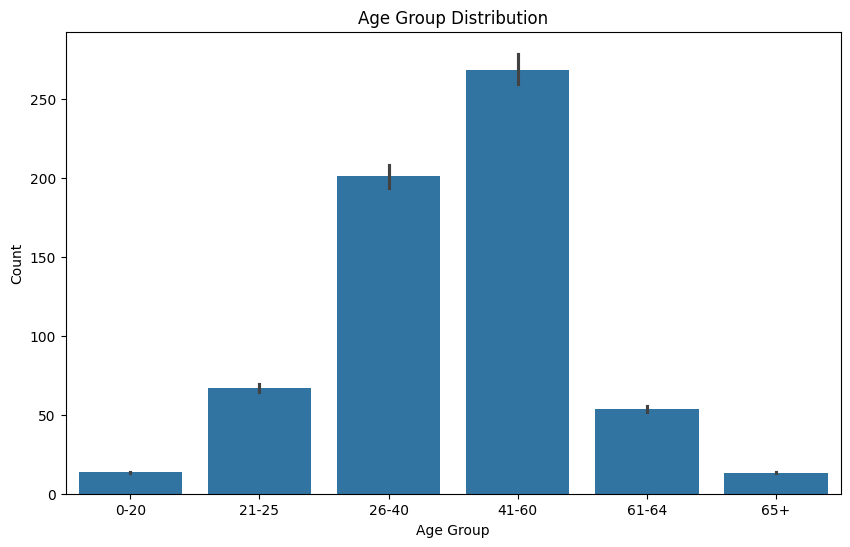

In [22]:
# Plotting the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', data=age_group_counts)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Age_group_counts Keep in rate_bining.csv file

In [23]:
age_group_counts.to_csv('rate_binning.csv')

# Join rate_binning.csv and Plan_Attributes.csv (MetalLevel column) with PlanId columns

In [24]:
df_rb = pd.read_csv('rate_binning.csv', low_memory=False)
df_pl = pd.read_csv('Plan_Attributes_PUF_2014_2015-03-09.csv', low_memory=False)

In [25]:
pd.set_option('display.max_columns',None)

In [47]:
df_rb.head()
df_rb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36808 entries, 0 to 36807
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  36808 non-null  int64 
 1   AgeGroup    36808 non-null  object
 2   PlanId      36808 non-null  object
 3   Count       36808 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [27]:
df_pl.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,BenefitPackageId,IssuerId2,StateCode2,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,HIOSProductId,HPID,NetworkId,ServiceAreaId,FormularyId,IsNewPlan,PlanType,MetalLevel,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,SpecialistRequiringReferral,PlanLevelExclusions,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ChildOnlyOffering,ChildOnlyPlanId,WellnessProgramOffered,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentPremiumS4,IsGuaranteedRate,SpecialtyDrugMaximumCoinsurance,InpatientCopaymentMaximumDays,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,PlanEffictiveDate,PlanExpirationDate,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,NationalNetwork,URLForSummaryofBenefitsCoverage,URLForEnrollmentPayment,PlanBrochure,FormularyURL,PlanId,CSRVariationType,IssuerActuarialValue,AVCalculatorOutputNumber,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,MEHBInnTier1IndividualMOOP,MEHBInnTier1FamilyMOOP,MEHBInnTier2IndividualMOOP,MEHBInnTier2FamilyMOOP,MEHBOutOfNetIndividualMOOP,MEHBOutOfNetFamilyMOOP,MEHBCombInnOonIndividualMOOP,MEHBCombInnOonFamilyMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier1FamilyMOOP,DEHBInnTier2IndividualMOOP,DEHBInnTier2FamilyMOOP,DEHBOutOfNetIndividualMOOP,DEHBOutOfNetFamilyMOOP,DEHBCombInnOonIndividualMOOP,DEHBCombInnOonFamilyMOOP,TEHBInnTier1IndividualMOOP,TEHBInnTier1FamilyMOOP,TEHBInnTier2IndividualMOOP,TEHBInnTier2FamilyMOOP,TEHBOutOfNetIndividualMOOP,TEHBOutOfNetFamilyMOOP,TEHBCombInnOonIndividualMOOP,TEHBCombInnOonFamilyMOOP,MEHBDedInnTier1Individual,MEHBDedInnTier1Family,MEHBDedInnTier1Coinsurance,MEHBDedInnTier2Individual,MEHBDedInnTier2Family,MEHBDedInnTier2Coinsurance,MEHBDedOutOfNetIndividual,MEHBDedOutOfNetFamily,MEHBDedCombInnOonIndividual,MEHBDedCombInnOonFamily,DEHBDedInnTier1Individual,DEHBDedInnTier1Family,DEHBDedInnTier1Coinsurance,DEHBDedInnTier2Individual,DEHBDedInnTier2Family,DEHBDedInnTier2Coinsurance,DEHBDedOutOfNetIndividual,DEHBDedOutOfNetFamily,DEHBDedCombInnOonIndividual,DEHBDedCombInnOonFamily,TEHBDedInnTier1Individual,TEHBDedInnTier1Family,TEHBDedInnTier1Coinsurance,TEHBDedInnTier2Individual,TEHBDedInnTier2Family,TEHBDedInnTier2Coinsurance,TEHBDedOutOfNetIndividual,TEHBDedOutOfNetFamily,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamily,SBCHavingaBabyDeductible,SBCHavingaBabyCopayment,SBCHavingaBabyCoinsurance,SBCHavingaBabyLimit,SBCHavingDiabetesDeductible,SBCHavingDiabetesCopayment,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesLimit,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,1,21989,AK,SHOP (Small Group),Yes,93-0438772,21989AK0020002,Premier,21989AK002,NaN,AKN001,AKS001,NaN,New,PPO,Low,NaN,Both,NaN,NaN,NaN,OOP Max only applies to pediatric benefits,NaN,NaN,NaN,NaN,Allows Adult and Child-Only,NaN,NaN,NaN,29,NaN,Guaranteed Rate,NaN,0,0,0,2014-01-01,2014-12-31,No,NaN,Yes,National Network,Yes,https://www.modahealth.com/producers/grp/den.s...,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,21989AK0020002-00,Standard Low Off Exchange Plan,70.00%,NaN,NaN,NaN,No,100%,NaN,Not Applicable,Not Applicable,NaN,NaN,Not Applicable,Not Applicable,$700,"$1,400",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,$50,$100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,1,21989,AK,SHOP (Small Group),Yes,93-0438772,21989AK0020002,Premier,21989AK002,NaN,AKN001,AKS001,NaN,New,PPO

In [40]:
df_metal = df_pl[['PlanId','MetalLevel']]
pd.set_option('display.max_columns',None)
df_metal.info()
df_metal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlanId      18719 non-null  object
 1   MetalLevel  18719 non-null  object
dtypes: object(2)
memory usage: 292.6+ KB


,PlanId,MetalLevel
0,21989AK0020002-00,Low
1,21989AK0020002-01,Low
2,21989AK0020001-00,High
3,21989AK0010001-00,Low
4,21989AK0010001-01,Low


In [41]:
df_metal['PlanId'] = df_metal['PlanId'].str[:-3]
df_metal.head()

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1170/2610296498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metal['PlanId'] = df_metal['PlanId'].str[:-3]


,PlanId,MetalLevel
0,21989AK0020002,Low
1,21989AK0020002,Low
2,21989AK0020001,High
3,21989AK0010001,Low
4,21989AK0010001,Low


In [42]:
merged_data = df_rb.merge(df_metal[['PlanId','MetalLevel']], on='PlanId', how='left')
merged_data.to_csv('rate_bining_merge_metal_level.csv')
df_m = pd.read_csv('rate_bining_merge_metal_level.csv', low_memory=False)
pd.set_option('display.max_columns',None)

In [43]:
df_m.head()

,Unnamed: 0.1,Unnamed: 0,AgeGroup,PlanId,Count,MetalLevel
0,0,36807,0-20,10191NJ0030001,1,Bronze
1,1,36807,0-20,10191NJ0030001,1,Bronze
2,2,36807,0-20,10191NJ0030001,1,Bronze
3,3,36807,0-20,10191NJ0030001,1,Bronze
4,4,35457,0-20,10191NJ0030002,1,Silver


In [46]:
df_m.info()
df_rb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106920 entries, 0 to 106919
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0.1  106920 non-null  int64 
 1   Unnamed: 0    106920 non-null  int64 
 2   AgeGroup      106920 non-null  object
 3   PlanId        106920 non-null  object
 4   Count         106920 non-null  int64 
 5   MetalLevel    106914 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36808 entries, 0 to 36807
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  36808 non-null  int64 
 1   AgeGroup    36808 non-null  object
 2   PlanId      36808 non-null  object
 3   Count       36808 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [55]:
df_bc = pd.read_csv('BenefitsCostSharing.csv', low_memory=False)
pd.set_option('display.max_columns',None)

In [47]:
df_bc.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,NaN,No,No,NaN,No,No,21989,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,No,No,21989,21989,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,"24 month waiting period, See policy for additi...",2014-03-19 07:06:49,Covered,NaN,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [56]:
merged_data = df_m.merge(df_bc[['PlanId','CopayInnTier1']], on='PlanId', how='left')
merged_data.to_csv('rate_metal_merge_copay.csv')

In [57]:
df_rmc = pd.read_csv('rate_metal_merge_copay.csv', low_memory=False)
pd.set_option('display.max_columns',None)

In [58]:
df_rmc.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AgeGroup,PlanId,Count,MetalLevel,CopayInnTier1
0,0,0,36807,0-20,10191NJ0030001,1,NaN,NaN
1,1,1,35457,0-20,10191NJ0030002,1,NaN,NaN
2,2,2,35100,0-20,10191NJ0040001,1,NaN,NaN
3,3,3,35099,0-20,10191NJ0040002,1,NaN,NaN
4,4,4,35098,0-20,10191NJ0050001,1,NaN,NaN
